<a href="https://colab.research.google.com/github/raja-singh-7389/Walmart-Sales-Analysis-and-Forecasting/blob/main/Walmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Loading the data using pandas

data = pd.read_csv('/content/Walmart DataSet.csv')

In [ ]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Basic summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# hence there is no missing value in the dataset so there is no need to remove any col or row
# Now converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


In [ ]:
# Now EDA
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


1. Question (a):
	•	Correlation is calculated between Weekly_Sales and Unemployment for each store.
	•	Stores with the most negative correlation are identified as suffering the most.
	2.	Question (b):
	•	Seasonal trends are analyzed by grouping sales by month. A line plot shows how sales vary over the year.
	3.	Question (c):
	•	Correlation between Temperature and Weekly_Sales is calculated for each store.
	•	A scatter plot is used to visualize the relationship.
	4.	Question (d):
	•	Correlation between CPI and Weekly_Sales is calculated for each store.
	•	A scatter plot shows how CPI affects sales.
	5.	Question (e):
	•	Total sales are summed for each store to determine the top-performing stores.
	•	A bar plot visualizes the ranking of stores based on sales.
	6.	Question (f):
	•	The worst-performing store is identified by finding the store with the lowest total sales.
	•	The difference between the best and worst stores’ total sales is calculated.
	•	A bar plot highlights the best and worst stores.

In [ ]:
# Question a :

correlations = data.groupby('Store').apply(
    lambda x: x['Weekly_Sales'].corr(x['Unemployment'])
)

print("Correlation between Weekly_Sales and Unemployment for each store:")
print(correlations.sort_values())

Correlation between Weekly_Sales and Unemployment for each store:
Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
4    -0.337015
17   -0.263600
3    -0.230413
37   -0.221287
5    -0.207043
43   -0.201954
9    -0.191534
13   -0.171633
7    -0.165382
40   -0.112528
32   -0.099455
1    -0.097955
20   -0.095341
23   -0.077169
16   -0.070864
26   -0.066899
31   -0.064738
8    -0.052580
11   -0.020339
27   -0.014275
24   -0.012261
12   -0.009286
25   -0.004958
45   -0.004041
34    0.017010
22    0.039043
6     0.044251
2     0.066325
15    0.078905
29    0.084682
33    0.101175
19    0.101464
10    0.131908
28    0.136671
18    0.139179
30    0.201862
14    0.210786
21    0.218367
35    0.483865
36    0.833734
dtype: float64


<ipython-input-18-515a244701dc>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = data.groupby('Store').apply(


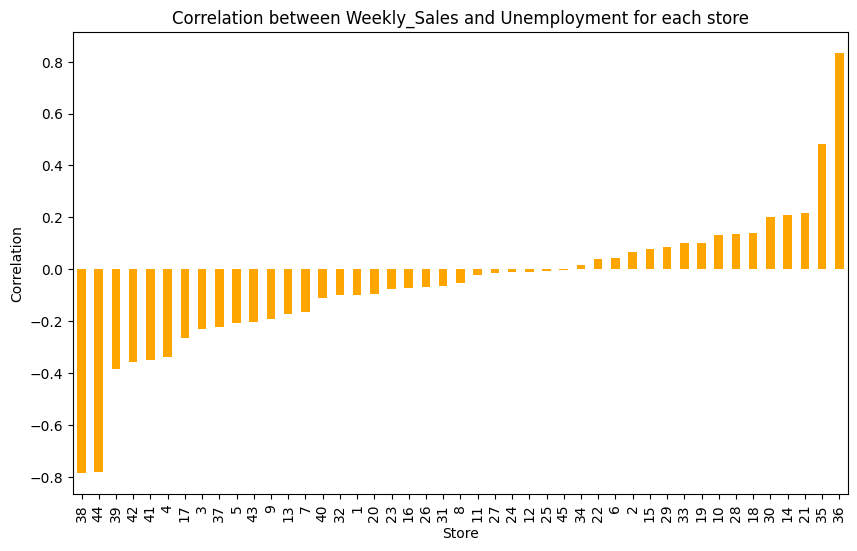

In [ ]:
# Plot correlation
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='bar', color='orange')
plt.title('Correlation between Weekly_Sales and Unemployment for each store')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.show()

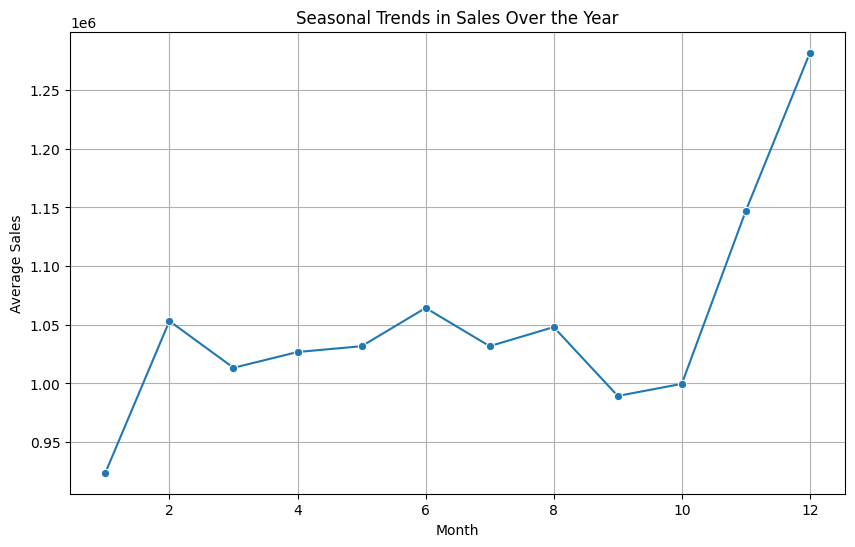

In [ ]:
# Question b
data['Month'] = data['Date'].dt.month
monthly_sales = data.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Seasonal Trends in Sales Over the Year')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid()
plt.show()

In [ ]:
print("Average monthly sales trend:")
print(monthly_sales)

Average monthly sales trend:
Month
1     9.238846e+05
2     1.053200e+06
3     1.013309e+06
4     1.026762e+06
5     1.031714e+06
6     1.064325e+06
7     1.031748e+06
8     1.048017e+06
9     9.893353e+05
10    9.996321e+05
11    1.147266e+06
12    1.281864e+06
Name: Weekly_Sales, dtype: float64


<ipython-input-25-377c85687304>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_temp = data.groupby('Store').apply(


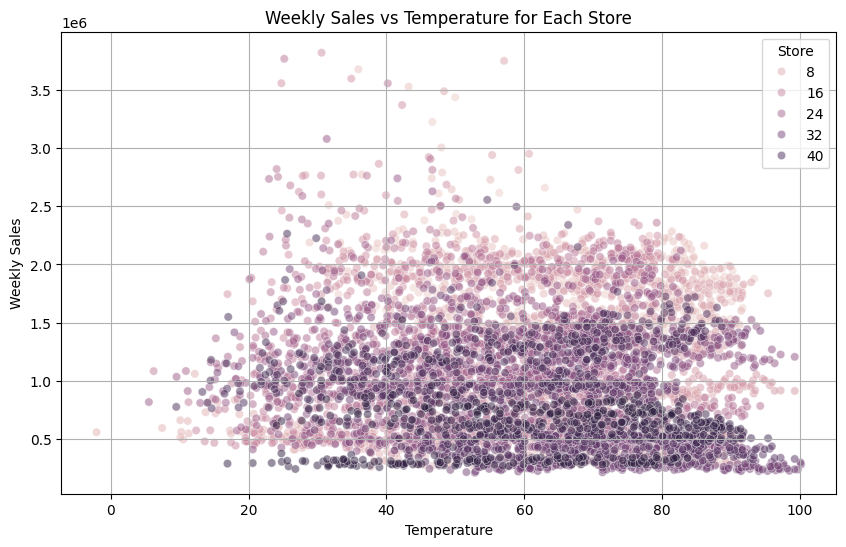

In [ ]:
# Question c:
correlation_temp = data.groupby('Store').apply(
    lambda x: x['Weekly_Sales'].corr(x['Temperature'])
)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, hue='Store', alpha=0.5)
plt.title('Weekly Sales vs Temperature for Each Store')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()


In [ ]:
print("Correlation between Weekly_Sales and Temperature for each store:")
print(correlation_temp)

Correlation between Weekly_Sales and Temperature for each store:
Store
1    -0.222701
2    -0.297673
3    -0.377524
4    -0.225583
5    -0.175517
6    -0.084863
7     0.015077
8    -0.312324
9    -0.208343
10   -0.432569
11   -0.278503
12   -0.379416
13   -0.137746
14   -0.199851
15   -0.050541
16    0.182948
17    0.081012
18   -0.144278
19   -0.080805
20   -0.264983
21   -0.177084
22   -0.082892
23    0.056257
24    0.111833
25   -0.031311
26    0.211722
27    0.121809
28   -0.376506
29   -0.129144
30   -0.330816
31   -0.262192
32   -0.111681
33    0.019244
34   -0.278523
35    0.043392
36   -0.094454
37   -0.300493
38    0.032993
39    0.064738
40    0.090598
41    0.106761
42   -0.151639
43    0.095272
44    0.267822
45   -0.201945
dtype: float64


<ipython-input-27-a75b63694cfa>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_cpi = data.groupby('Store').apply(


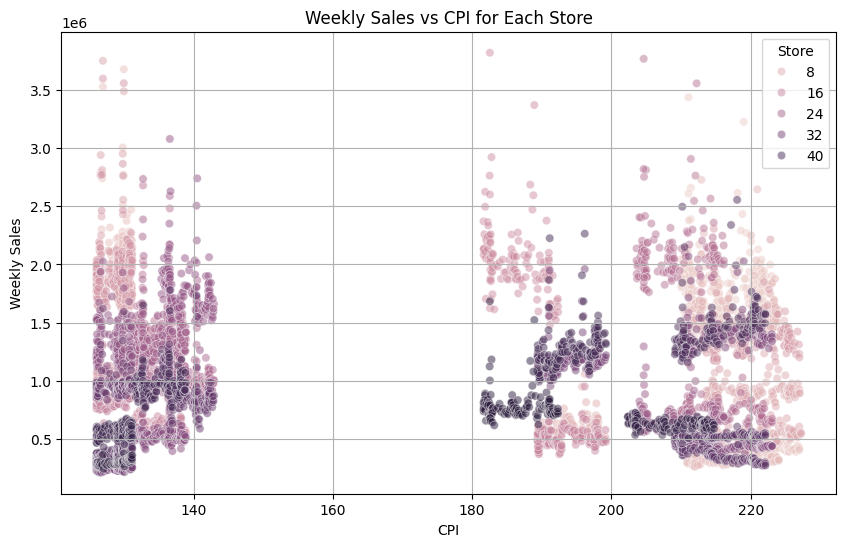

Correlation between Weekly_Sales and CPI for each store:
Store
1     0.225408
2    -0.062431
3     0.317250
4     0.351157
5     0.308261
6    -0.011357
7     0.289044
8     0.120255
9     0.294805
10   -0.115374
11    0.069781
12    0.084087
13    0.163976
14   -0.419755
15   -0.174467
16    0.124285
17    0.348571
18   -0.193541
19   -0.155341
20    0.058706
21   -0.163649
22   -0.038602
23    0.084248
24   -0.013684
25   -0.010914
26    0.131980
27   -0.213082
28   -0.095908
29   -0.072530
30   -0.298188
31    0.132887
32    0.196782
33   -0.052271
34    0.115437
35   -0.424107
36   -0.915095
37    0.244507
38    0.812837
39    0.428043
40    0.113318
41    0.392293
42    0.360859
43   -0.285686
44    0.740150
45   -0.023548
dtype: float64


In [ ]:
# Question d
correlation_cpi = data.groupby('Store').apply(
    lambda x: x['Weekly_Sales'].corr(x['CPI'])
)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data, hue='Store', alpha=0.5)
plt.title('Weekly Sales vs CPI for Each Store')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()

print("Correlation between Weekly_Sales and CPI for each store:")
print(correlation_cpi)

In [ ]:
# Question e :
total_sales_by_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

print("Top 5 Performing Stores : ")
print(total_sales_by_store.head(5))

Top 5 Performing Stores : 
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


<ipython-input-30-f17996bc6292>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_by_store.index, y=total_sales_by_store.values, palette='viridis')


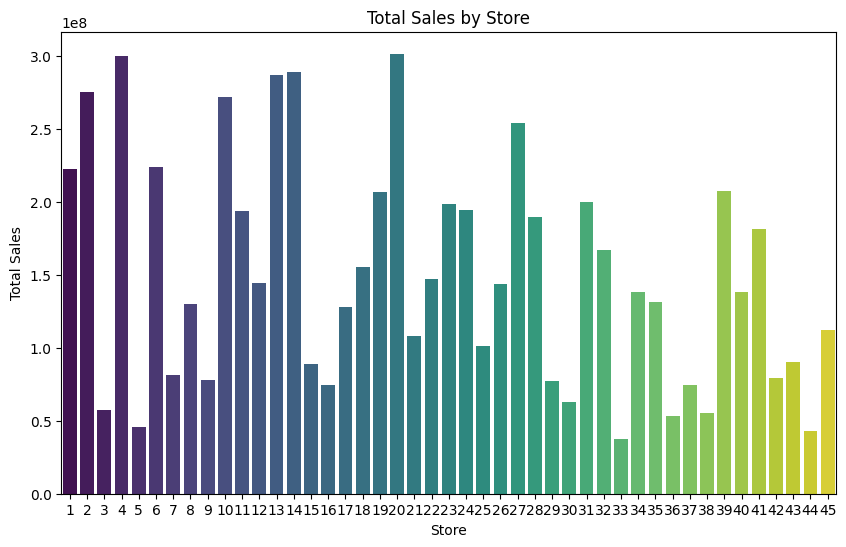

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_by_store.index, y=total_sales_by_store.values, palette='viridis')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# Question f:
worst_performing_store = total_sales_by_store.idxmin()
best_performing_store = total_sales_by_store.idxmax()
sales_difference = total_sales_by_store[best_performing_store] - total_sales_by_store[worst_performing_store]

print(f"The worst-performing store is Store {worst_performing_store} with a total sales of {total_sales_by_store[worst_performing_store]}.")
print(f"The best-performing store is Store {best_performing_store} with a total sales of {total_sales_by_store[best_performing_store]}.")
print(f"The difference between the best and worst stores' total sales is {sales_difference}.")


The worst-performing store is Store 33 with a total sales of 37160221.96.
The best-performing store is Store 20 with a total sales of 301397792.46.
The difference between the best and worst stores' total sales is 264237570.49999997.


<ipython-input-34-ae9a60160fa1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_by_store.index, y=total_sales_by_store.values, palette='viridis')


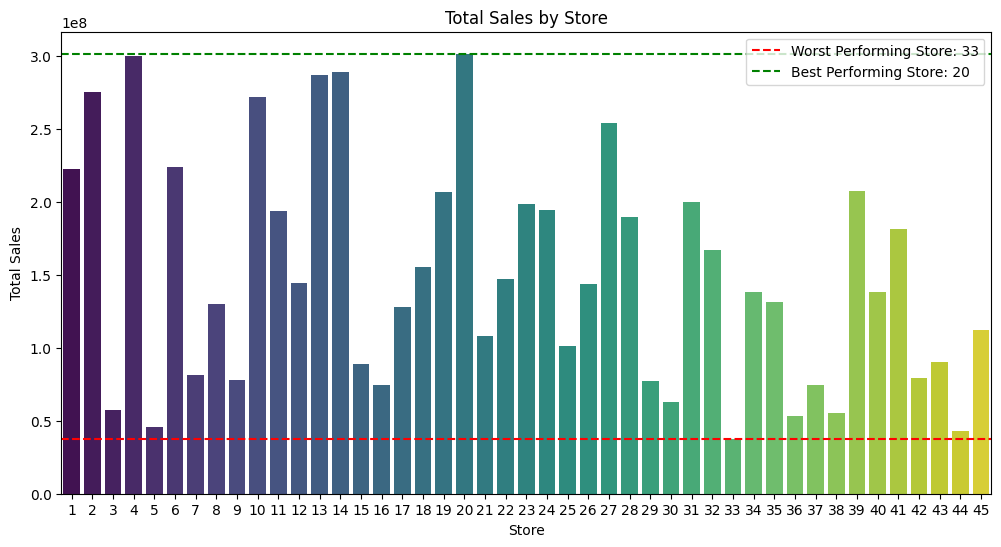

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=total_sales_by_store.index, y=total_sales_by_store.values, palette='viridis')
plt.axhline(y=total_sales_by_store[worst_performing_store], color='red', linestyle='--',label=f"Worst Performing Store: {worst_performing_store}")
plt.axhline(y=total_sales_by_store[best_performing_store], color='green', linestyle='--',label=f"Best Performing Store: {best_performing_store}")
plt.legend()
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# Making a Prediction model
# Aggregating data for prediction
store_sales = data.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

# prepare data for modeling
store_sales['Week']= store_sales['Date'].dt.isocalendar().week
store_sales['Year']= store_sales['Date'].dt.year


In [ ]:
# Forecasting for each store
forecast_results = {}
for store in store_sales['Store'].unique():
    store_data = store_sales[store_sales['Store'] == store].set_index('Date')
    train_data = store_data['Weekly_Sales']

    model = ExponentialSmoothing(train_data, seasonal_periods=52, trend='add', seasonal='add').fit()
    forecast = model.forecast(steps=12)

    forecast_results[store] = forecast


In [ ]:
# Display forecasts for each store
for store, forecast in forecast_results.items():
  print(f"Store {store} 12 week forecast: /n", forecast)

Store 1 12 week forecast: /n 2012-11-02    1.693358e+06
2012-11-09    1.620154e+06
2012-11-16    1.594745e+06
2012-11-23    2.073905e+06
2012-11-30    1.653565e+06
2012-12-07    1.814153e+06
2012-12-14    1.982550e+06
2012-12-21    2.448516e+06
2012-12-28    1.509116e+06
2013-01-04    1.577890e+06
2013-01-11    1.512378e+06
2013-01-18    1.448782e+06
Freq: W-FRI, dtype: float64
Store 2 12 week forecast: /n 2012-11-02    2.019098e+06
2012-11-09    1.994841e+06
2012-11-16    2.023961e+06
2012-11-23    2.733057e+06
2012-11-30    2.090910e+06
2012-12-07    2.452285e+06
2012-12-14    2.667200e+06
2012-12-21    3.493344e+06
2012-12-28    1.893737e+06
2013-01-04    1.881106e+06
2013-01-11    1.858662e+06
2013-01-18    1.858757e+06
Freq: W-FRI, dtype: float64
Store 3 12 week forecast: /n 2012-11-02    478763.986845
2012-11-09    440557.598327
2012-11-16    426960.941754
2012-11-23    616447.651589
2012-11-30    528289.630054
2012-12-07    520205.709470
2012-12-14    551531.156607
2012-12-21   

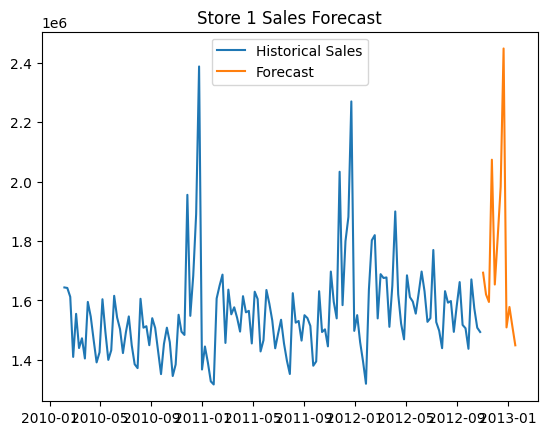

In [ ]:
# Plot
store = list(forecast_results.keys())[0]
plt.plot(store_sales[store_sales['Store']== store]['Date'],store_sales[store_sales['Store'] == store]['Weekly_Sales'], label='Historical Sales')
plt.plot(forecast_results[store].index, forecast_results[store].values, label = 'Forecast')

plt.title(f"Store {store} Sales Forecast")
plt.legend()
plt.show()